<div dir=rtl><h1>
&emsp;
&emsp;
&emsp;
&emsp;
&emsp;
<b>
פרוייקט חלק 4
</b>
</h1>

<h4>
שמות: אריאל נובומינסקי, אילי ששון
</br>
ת.ז. : 322228974, 322995358
</h4>


</div>

<div dir=rtl>
<h4>
<br>
<br>

נטען את סט הנתונים ונבצע את הטרנספורמציות שביצענו בחלק הראשון:
</h4>


</div>

In [ ]:
import datetime
import statsmodels.api as sm
import scipy.stats as dist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, scipy.stats as st
import math
import matplotlib.patches as mpatches
from tabulate import tabulate
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from scipy.linalg import fractional_matrix_power
import itertools
from scipy.linalg import fractional_matrix_power


In [ ]:
df = pd.read_csv("/content/googleplaystore.csv")
df = df.drop(df[(df.Type !='Paid') & (df.Type !='Free')].index)
df = df.dropna()
isFree_Data = df.Type.apply(lambda x: True if x=='Free' else False)
df.insert(7,'IsFree',isFree_Data)
df = df.drop('Type', 1)
df['Last Updated'] = df['Last Updated'].str.replace(',', '')
Last_Updated=pd.to_datetime(df['Last Updated'], format='%B %d %Y')
df = df.drop('Last Updated',axis=1)
df.insert(9,'Last Updated',Last_Updated)
recntly = df['Last Updated'].map(lambda x: True if x > datetime.date(2018,6,1) else False)
df.insert(9,'Recntly Updated',recntly)
df['Installs'] = df['Installs'].map(lambda s: int(s[:-1].replace(',', '')))
df['Reviews'] = df['Reviews'].map(lambda s: int(s))
df.head()

,App,Category,Rating,Reviews,Size,Installs,IsFree,Price,Content Rating,Recntly Updated,Last Updated,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,True,0,Everyone,False,2018-01-07,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,True,0,Everyone,False,2018-01-15,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,True,0,Everyone,True,2018-08-01,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,True,0,Teen,True,2018-06-08,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,True,0,Everyone,True,2018-06-20,Art & Design;Creativity,1.1,4.4 and up


In [ ]:
ln_reg_df = df[['Rating', 'Reviews', 'Content Rating', 'Installs']]
con_rat_vals = ln_reg_df['Content Rating'].unique()

for v in con_rat_vals:
  ln_reg_df[v] = np.where(ln_reg_df['Content Rating'] == v, 1, 0)

ln_reg_df['Installs'] = ln_reg_df['Installs'].map(lambda x: np.log10(x))
ln_reg_df['Reviews'] = ln_reg_df['Reviews'].map(lambda x: np.log10(x))
B = 400
confidence_intervals = {}
for i in range(8):
  confidence_intervals[i] = []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

<div dir=rtl>
<h3>
<b>
חלק א'
<b>
</h3>
</div>

<div dir=rtl>
<h4>
1. נדגום תת מדגם בגודל 200:
</h4>
</div>

In [ ]:
sub_set = ln_reg_df.sample(200, random_state=18)

<div dir=rtl>
<h4>
א.
נמצא רווח סמך למקדמים בטא באמצעות קירוב נורמלי כאשר האומד לסטיית התקן מבוסס על מטריצת השונויות:
</h4>
</div>

In [ ]:
y = sub_set['Installs'].to_numpy()
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()
reg_sub = linear_model.LinearRegression()
reg_sub.fit(x_vals, sub_set['Installs'].to_numpy())
beta_cova = reg_sub.intercept_ + reg_sub.coef_
p = len(beta_cova) + 1

con_rat_vals = ln_reg_df['Content Rating'].unique()
y_cova = reg_sub.predict(x_vals)
x_vals = sub_set.drop(['Content Rating', 'Installs'], 1).to_numpy()
x_vals = np.array([np.insert(x, 1, 0) for x in x_vals])
c = np.dot(x_vals.T, x_vals)
c = np.linalg.pinv(c)

eps_sigma =  sum([x**2 for x in y - y_cova])/(len(y) - p)
normal_intervals = []
for i,b in enumerate(beta_cova):
  confidence_intervals[i].append([b - dist.norm.ppf(0.95, 0, 1)*eps_sigma*c[i][i],b + dist.norm.ppf(0.95, 0, 1)*eps_sigma*c[i][i]])
  print('Confidence Interval For Coefficient Number ', i, ': [', b - dist.norm.ppf(0.95, 0, 1)*eps_sigma*c[i][i], ', ',  b + dist.norm.ppf(0.95, 0, 1)*c[i][i], ']')
  i += 1

Confidence Interval For Coefficient Number  0 : [ 2.465110722221054 ,  2.5033890074317413 ]
Confidence Interval For Coefficient Number  1 : [ 3.6479610966437144 ,  3.6479610966437144 ]
Confidence Interval For Coefficient Number  2 : [ 2.8447588483981443 ,  2.849144982227141 ]
Confidence Interval For Coefficient Number  3 : [ 2.7358085451872123 ,  3.3833101079861696 ]
Confidence Interval For Coefficient Number  4 : [ 2.2750292042363016 ,  3.0966161604748907 ]
Confidence Interval For Coefficient Number  5 : [ 2.4702166706667485 ,  3.6928613636679906 ]
Confidence Interval For Coefficient Number  6 : [ 2.5727263824946744 ,  3.29978192469056 ]
Confidence Interval For Coefficient Number  7 : [ 2.69238468972564 ,  2.69238468972564 ]


<div dir=rtl>
<h4>
נמצא רווח סמך למקדמים בטא באמצעות קירוב נורמלי כאשר האומד לסטיית התקן מבוסס 
על Bootstrap:
</h4>
</div>

In [ ]:
beta_covas = []
for i in range(B):
  sample = sub_set.sample(n=50)
  y = sample['Installs'].to_numpy()
  x_vals = sample.drop(['Content Rating', 'Installs'], 1).to_numpy()
  reg = linear_model.LinearRegression()
  reg.fit(x_vals, sample['Installs'].to_numpy())
  beta_cova_cur = reg.intercept_ + reg.coef_
  beta_covas.append(beta_cova_cur)
vars = []
for i in range(len(beta_covas[0])):
  betas = [sample[i] for sample in beta_covas]
  vars.append(np.var(betas))
for i,b in enumerate(beta_cova):
  confidence_intervals[i].append([b - dist.norm.ppf(0.95, 0, 1)*vars[i],b + dist.norm.ppf(0.95, 0, 1)*vars[i]])
  print('Confidence Interval For Coefficient Number ', i, ': [', b - dist.norm.ppf(0.95, 0, 1)*vars[i], ', ',  b + dist.norm.ppf(0.95, 0, 1)*vars[i], ']')


Confidence Interval For Coefficient Number  0 : [ 1.9853437916995507 ,  2.9574772810960708 ]
Confidence Interval For Coefficient Number  1 : [ 2.8730960903527456 ,  4.422826102934684 ]
Confidence Interval For Coefficient Number  2 : [ 2.101956886277944 ,  3.589004544370317 ]
Confidence Interval For Coefficient Number  3 : [ 1.9120683854232936 ,  3.7726794396400445 ]
Confidence Interval For Coefficient Number  4 : [ 1.3884795240769248 ,  3.432011330669677 ]
Confidence Interval For Coefficient Number  5 : [ 1.9478894752171003 ,  3.3949879321298173 ]
Confidence Interval For Coefficient Number  6 : [ 1.9068461212702803 ,  3.4779232581809993 ]
Confidence Interval For Coefficient Number  7 : [ 1.9068461212702803 ,  3.4779232581809993 ]


<div dir=rtl>
<h4>
ג. בהרצאה ראינו כי רווח סמך כאשר ההתפגלות לא ידוע הוא: 
</h4>
</div>

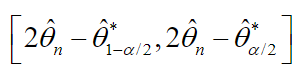

<div dir=rtl>
<h4>
נמצא רווח סמך בשיטת ה - Pivot: 
</h4>
</div>

In [ ]:
beta_covas = []
for i in range(B):
  sample = sub_set.sample(n=50)
  y = sample['Installs'].to_numpy()
  x_vals = sample.drop(['Content Rating', 'Installs'], 1).to_numpy()
  reg = linear_model.LinearRegression()
  reg.fit(x_vals, sample['Installs'].to_numpy())
  beta_cova_cur = reg.intercept_ + reg.coef_
  beta_covas.append(beta_cova_cur)
perci = []
for i in range(len(beta_covas[0])):
  betas = [sample[i] for sample in beta_covas]
  betas.sort()
  perci.append([betas[int((1-(0.05/2))*B)],betas[int((0.05/2)*B)]])
for i,b in enumerate(beta_cova):
  confidence_intervals[i].append([2*b - perci[i][0],2*b - perci[i][1]])
  print('Confidence Interval For Coefficient Number ', i, ': [', 2*b - perci[i][0], ', ',  2*b - perci[i][1], ']')

Confidence Interval For Coefficient Number  0 : [ 1.0570175242502957 ,  3.1545658992881878 ]
Confidence Interval For Coefficient Number  1 : [ 1.8886131152807888 ,  4.573298001833749 ]
Confidence Interval For Coefficient Number  2 : [ 1.1287343891689083 ,  3.8041264773347967 ]
Confidence Interval For Coefficient Number  3 : [ 0.9592783250502581 ,  3.9442409552191773 ]
Confidence Interval For Coefficient Number  4 : [ 0.3921403165203001 ,  3.346493078404789 ]
Confidence Interval For Coefficient Number  5 : [ 1.0094370286646868 ,  3.6279681009459726 ]
Confidence Interval For Coefficient Number  6 : [ 0.9177824339256144 ,  3.5955339342449273 ]
Confidence Interval For Coefficient Number  7 : [ 0.9177824339256144 ,  3.5955339342449273 ]


<div dir=rtl>
<h4>
2. 
נמצא רווח סמך בשיטת האחוזונים: 
</h4>
</div>

In [ ]:
for i in range(len(beta_covas[0])):
  betas = [sample[i] for sample in beta_covas]
  confidence_intervals[i].append([np.quantile(betas, .025),np.quantile(betas, .975)])
  print('Confidence Interval For Coefficient Number ', i, ': [',   np.quantile(betas, .025), ', ',    np.quantile(betas, .975), ']')

Confidence Interval For Coefficient Number  0 : [ 1.787665851585841 ,  3.824730279310141 ]
Confidence Interval For Coefficient Number  1 : [ 2.7226233489546963 ,  5.387219304798712 ]
Confidence Interval For Coefficient Number  2 : [ 1.8867657474994317 ,  4.549336680343807 ]
Confidence Interval For Coefficient Number  3 : [ 1.7402300811143878 ,  4.680748996263595 ]
Confidence Interval For Coefficient Number  4 : [ 1.4739190758695315 ,  4.425520624129794 ]
Confidence Interval For Coefficient Number  5 : [ 1.7147555510069128 ,  4.285743913349424 ]
Confidence Interval For Coefficient Number  6 : [ 1.7879818764071822 ,  4.4455832281261305 ]
Confidence Interval For Coefficient Number  7 : [ 1.7879818764071822 ,  4.4455832281261305 ]


<div dir=rtl>
<h4>
נציג השוואה בין רווחי הסמך השונים (בהמשך נציג השוואה יותר "קומפקטית"):
</h4>
</div>

In [ ]:
names = ['se based on varience matrix of beta^','se based on bootstrap','the pivot method','the percinailes method' ]
y = ln_reg_df['Installs'].to_numpy()
x_vals = ln_reg_df.drop(['Content Rating', 'Installs'], 1).to_numpy()
full_reg = linear_model.LinearRegression()
full_reg.fit(x_vals, y)
beta_cova_full = full_reg.intercept_ + full_reg.coef_
for i,beta_i in enumerate(confidence_intervals):
  print('The cofidence interval for Coefficient Number '+str(i+1)+' is:')
  print('The estimitaion of beta ', i,'based on the whole data is ',beta_cova_full[i])
  for j in range(4):
    in_range = "n't" 
    if beta_cova_full[i] <= confidence_intervals[i][j][1] and beta_cova_full[i] >= confidence_intervals[i][j][0]:
      in_range = '' 
    print('[',   confidence_intervals[i][j][0], ', ',    confidence_intervals[i][j][1], ']',' with',names[j],'.It has a length of ',confidence_intervals[i][j][1]-confidence_intervals[i][j][0], 'and the whole data enstimatior is'+in_range+'in the cofidence interval')
  print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')

The cofidence interval for Coefficient Number 1 is:
The estimitaion of beta  0 based on the whole data is  2.6071099559937427
[ 2.465110722221054 ,  2.4777103505745672 ]  with se based on varience matrix of beta^ .It has a length of  0.012599628353513026 and the whole data enstimatior isn'tin the cofidence interval
[ 1.9853437916995507 ,  2.9574772810960708 ]  with se based on bootstrap .It has a length of  0.9721334893965201 and the whole data enstimatior isin the cofidence interval
[ 1.0570175242502957 ,  3.1545658992881878 ]  with the pivot method .It has a length of  2.097548375037892 and the whole data enstimatior isin the cofidence interval
[ 1.787665851585841 ,  3.824730279310141 ]  with the percinailes method .It has a length of  2.0370644277243 and the whole data enstimatior isin the cofidence interval
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
The cofidence interval for Coefficient Number 2 is:
The estimitaion of beta  1 based on

<div dir=rtl>
<h4>
את ההשואה הנ"ל ניתן לראות בצורה פשוטה בתרשים הבא:
</h4>
</div>

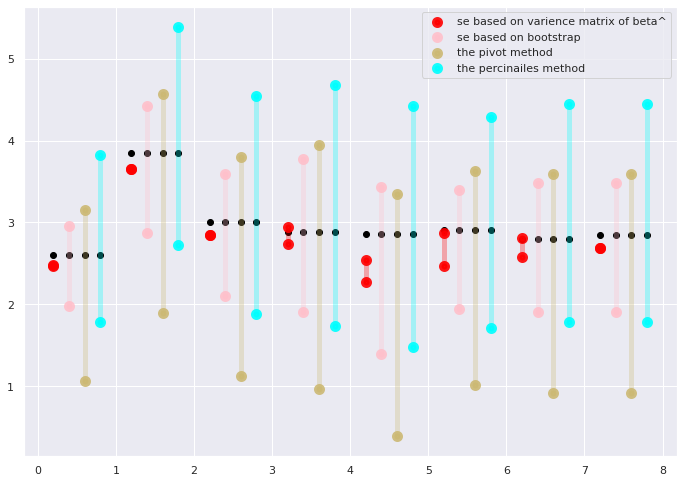

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

full_reg = linear_model.LinearRegression()
full_reg.fit(x_vals, y)
beta_cova_full = full_reg.intercept_ + full_reg.coef_

colors = ['red', 'pink', 'y', 'cyan']
w_list = [6, 7, 15, 20]
ep_list = [0.2, 0.4, 0.6, 0.8]

j = 0
for i in range(8):
  for j in range(4):
    if i == 0:
      plt.scatter([i + ep_list[j]], [beta_cova_full[i]], color='black')
      plt.vlines(x = i + ep_list[j], ymin = confidence_intervals[i][j][0], ymax = confidence_intervals[i][j][1], alpha=0.3, color=colors[j], linewidths=5)
      plt.scatter([[i + ep_list[j], i+ ep_list[j]]], [confidence_intervals[i][j]],linewidths=5, color=colors[j], alpha=0.9, label=names[j])
    else:
      plt.scatter([i + ep_list[j]], [beta_cova_full[i]], color='black')
      plt.vlines(x = i + ep_list[j], ymin = confidence_intervals[i][j][0], ymax = confidence_intervals[i][j][1], alpha=0.3, color=colors[j], linewidths=5)
      plt.scatter([[i + ep_list[j], i+ ep_list[j]]], [confidence_intervals[i][j]],linewidths=5, color=colors[j], alpha=0.9)  
plt.legend()
plt.show()    

<div dir=rtl>
<h4>
נשים לב כי אורכי רווחי הסמך המבוסס על הקירוב הנורמלי עם השונות של מטריצת השונויות הוא מאוד קטן ולרוב לא מכיל את הערך שנחזה על ידי כל המדגם. הדבר מעיד על כך שהנחת הנורמליות היא הנחה חזקה מידי במקרה זה.
</h4>
</div>

<div dir=rtl>
<h4>
3. 
<br>
א.
נחזה את הערכים y_new:
</h4>
</div>

In [ ]:
without_subset = pd.concat([ln_reg_df, sub_set, sub_set]).drop_duplicates(keep=False)
without_subset_sample_one = without_subset.sample(n=100)
y_cova_without_one = reg_sub.predict(without_subset_sample_one.drop(['Content Rating', 'Installs'], 1))
print('Predictions: ')
print( y_cova_without_one)

Predictions: 
[5.55871303 3.57664923 2.65246158 6.47000423 3.85569525 7.08815419
 5.99734802 7.5364927  6.13183695 2.46251335 4.74200793 5.56810661
 4.8757357  4.8332814  5.08545185 7.15293934 5.08690699 5.54678957
 7.70394543 2.54111369 3.0927251  8.01666849 6.15337074 3.02029059
 4.48582425 4.02420783 4.87666521 4.38579622 5.87139928 8.14790051
 7.07980747 5.49889911 4.27719421 3.83020074 6.6440621  7.83276195
 7.20016316 6.03655208 7.28759693 3.48062489 3.34161742 6.78735571
 6.70532034 5.21719181 3.83093859 5.7044499  7.34052432 5.7182561
 6.1427724  4.53439915 3.42660244 8.00486835 7.90173746 4.02244096
 5.88729738 3.65420875 4.96226074 3.02604209 4.66145483 6.36701443
 6.08960655 2.62950335 4.94268513 3.87475721 4.22251944 4.61812982
 5.85785712 4.39442093 5.66558564 6.50482155 5.82889448 5.02377905
 6.66725497 4.97474097 4.52298546 5.23077382 4.71704472 3.75638359
 7.43712249 2.92653199 4.15622719 6.6777928  6.14034227 4.8406024
 6.0697019  2.92764045 5.01666768 6.78925583 7.478

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<div dir=rtl>
<h4>
ב.
נחשב רווחי סמך לתוחלת התחזית לפי שיטת האחוזונים:
</h4>
</div>

In [ ]:
vals = []

c = 0

for i in range(B):
  sample = sub_set.sample(n=50, random_state=i)
  reg = linear_model.LinearRegression()
  reg.fit(sample.drop(['Content Rating', 'Installs'], 1), sample['Installs'].to_numpy())
  y_cova_without = reg.predict(without_subset_sample_one.drop(['Content Rating', 'Installs'], 1))
  vals.append(y_cova_without)
quantiles = []
for i in range(len(vals[0])):
  cur_vals = [sample[i] for sample in vals]
  if c < 5 or c > 95:
    print('Confidence Interval For E[Ynew|Xnew] is', i, ': [',   np.quantile(cur_vals,.025), ', ',    np.quantile(cur_vals, .975), ']')
  if c == 5:
    print('.')  
    print('.')  
    print('.')  

  c += 1  
  quantiles.append([np.quantile(cur_vals,.025),np.quantile(cur_vals,.975)])
count = 0
for i,ynew in enumerate(without_subset_sample_one['Installs']):
  if ynew <= quantiles[i][1] and ynew >=  quantiles[i][0]:
    count += 1
print()    
print('Percentage Of Confidence Intervals that Contain The True Value: ', count, '%')

Confidence Interval For E[Ynew|Xnew] is 0 : [ 5.418309065182985 ,  5.733767092200368 ]
Confidence Interval For E[Ynew|Xnew] is 1 : [ 3.32226069372322 ,  4.061084905332692 ]
Confidence Interval For E[Ynew|Xnew] is 2 : [ 2.30985804974927 ,  3.0334232461031876 ]
Confidence Interval For E[Ynew|Xnew] is 3 : [ 6.3109723928092425 ,  6.622786499530787 ]
Confidence Interval For E[Ynew|Xnew] is 4 : [ 3.6770887593387385 ,  4.086168751348349 ]
.
.
.
Confidence Interval For E[Ynew|Xnew] is 96 : [ 3.8614971847900637 ,  4.325944105380476 ]
Confidence Interval For E[Ynew|Xnew] is 97 : [ 4.119697067106713 ,  4.626923635764012 ]
Confidence Interval For E[Ynew|Xnew] is 98 : [ 6.611703272265734 ,  6.983396031752885 ]
Confidence Interval For E[Ynew|Xnew] is 99 : [ 5.438136970452163 ,  5.777123654503621 ]

Percentage Of Confidence Intervals that Contain The True Value:  53 %


<div dir=rtl>
<h4>
אחוז רווחי הסמך שמכילים את הערך האמיתי הוא 41%, ערך רחוק מאוד מ - 95%. התוצאה לא מפתיע מכיוון שבחישוב רווחי הסמך לתוחלת אנו לא מתחשבים בשונות הרעש ולכן הגיוני שרווח הסמך לא יהיה מדויק.
</h4>
</div>

<div dir=rtl>
<h4>
ד. על מנת לחשב רווחי תחזית נצטרך להתחשב בשונות הרעש. נבצע את החישוב באופן הבא:
<br>
לכל b בין 1 ל - B נדגום מדגם אקראי מתוך המדגם המקורי (בגודל 200) מדגם בגודל 50.
<br>
נבצע רגרסיה לינארית על המדגם הנ"ל ונחשב לכל X_new את ערך הפרדיקציה Y_new, נכניס ערכים אלו למערך Y_new_preds
<br>
לאחר שביציענו את הפעולות הנ"ל נחשב לכל Y_new את השונות באופן הבא:
<br>
s.e.(Y_new) = sqrt(sqwer_mean(Y_new_preds) - sqwer(mean(Y_new_preds) + mean(sigma_epsilon_sqwer)
<br>
כאשר sigma_epsilon_sqwer הוא מערך המכיל השונויות האמפיריות של כל ה -  Y_new
<br>
כעת, נחשב קירוב נורמלי לרווח הסמך כאשר נשתמש ב - s.e.  שחישבנו קודם.
</h4>
</div>

<div dir=rtl>
<h3>
<b>
חלק ב'
<b>
</h3>
</div>

<div dir=rtl>
<h4>
נזכר כי בחלק השני של הפרוייקט בדקנו אם הדירגו של האפליקציה שונה בין אפליקציות שעודכנו לאחרונה לבין אפליקציות שלא עודכנו לאחרונה.
<br>
1. שאלת המחקר שלנו:
<br>
האם התפלגות ערכי הדירוגים של אפליקציות שעודכנו לאחרונה גדולים מהתפלגות ערכי הדירוגים של האפליקציות שלא עודכנו לאחרונה.
<br>
<br> 
2. נבחר תת מדגם בגודל 200 באופן אקראי:
</h4>
</div>

In [ ]:
sample = df.sample(n=200, random_state=2)

<div dir=rtl>
<h4>
נחלק את המדגם לשני מדגמים לפי המשתנה הבינארי "עודכנו לאחרונה":
</h4>


</div>

In [ ]:
updated_sample = sample[sample['Recntly Updated']]
not_updated_sample = sample[sample['Recntly Updated'] == False]

print('Size Of The First Sample: ', len(updated_sample))
print('Size Of The Second Sample: ', len(not_updated_sample))

Size Of The First Sample:  107
Size Of The Second Sample:  93


<div dir=rtl>
<h4>
נשים לב כי גודלי המדגמים מאוד קרובים זה לזה.
<br>
<br>
נסתכל על ההיסטוגרמה של הדירוגים בקבוצת השונות:
</h4>
</div>

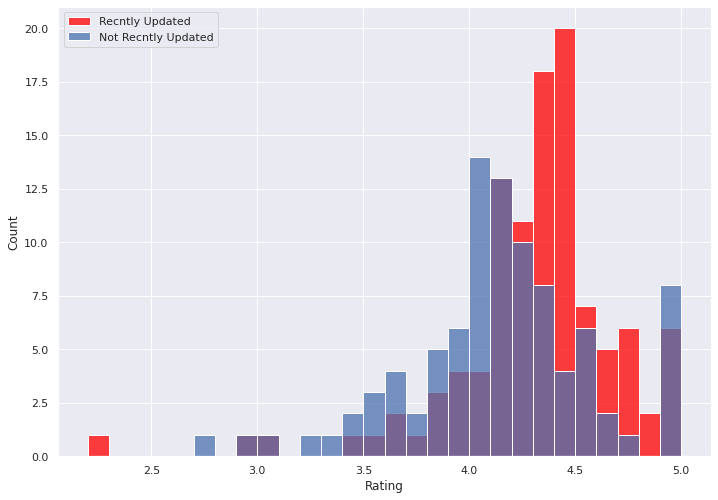

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(updated_sample['Rating'], binwidth=0.1, color='red', label = 'Recntly Updated')
sns.histplot(not_updated_sample['Rating'], binwidth=0.1, label = 'Not Recntly Updated')
plt.legend()
plt.show()

<div dir=rtl>
<h4>
מהיסטוגרמה אנו מקבלים רמז לקח שההתפלגויות אכן שונות. נראה כי שני מדגמי הדירוגים מתפלגות נורמלית עם זנב שמאלי כבד אך פרמטרי ההתפלגות שונים.
התפלגות הדירוגים באפליקציות שעודכנו לאחרונה אכן נראים גדולים מהערכים בקטגוריה השנייה.
</h4>
</div>

<div dir=rtl>
<h4>
3.
<br>
א. נאמוד את התוחלות ואת דלתא באמצעות הממוצע:
</h4>
</div>

In [ ]:
print('Estimation For mu1 : ', np.mean(updated_sample['Rating']))
print('Estimation For mu2 : ', np.mean(not_updated_sample['Rating']))
print('Estimation For Delta : ', np.mean(updated_sample['Rating']) - np.mean(not_updated_sample['Rating']))

Estimation For mu1 :  4.356074766355138
Estimation For mu2 :  4.18494623655914
Estimation For Delta :  0.17112852979599769


<div dir=rtl>
<h4>
האומד שקיבלנו הוא אומד נראות מירבית. כפי שראינו קודם, הנתונים שלנו הם בקירוב נורמליים, עד כדי זנב שמאלי, ולכן הממוצע יהיה אנ"מ לתוחלת. 
</h4>
</div>

<div dir=rtl>
<h4>
ב. נמצא רווח סמך לדלתא:
</h4>
</div>

In [ ]:
n1 = len(updated_sample['Rating'])
n2 = len(not_updated_sample['Rating'])
s1_sq = (np.var(updated_sample['Rating'])*n1)/(n1 - 1)
s2_sq = (np.var(not_updated_sample['Rating'])*n2)/(n2 - 1)
se = np.sqrt((((n1 - 1)*s1_sq + (n2 - 1)*s2_sq)/(n1 + n2 - 2))*((n1 + n2)/(n1*n2)))
ex = np.mean(updated_sample['Rating']) - np.mean(not_updated_sample['Rating'])
print('Confidence Interval For Delta: [', ex - dist.norm.ppf(0.975)*se, ',', ex + dist.norm.ppf(0.975)*se, ']')

Confidence Interval For Delta: [ 0.05221648189505139 , 0.29004057769694397 ]


<div dir=rtl>
<h4>
ג. נאמוד את דלתא לפי כל המדגם:
</h4>
</div>

In [ ]:
print('Estimation For Delta Based On All The Data: ', np.mean(df[df['Recntly Updated']]['Rating']) - \
      np.mean(df[df['Recntly Updated'] == False]['Rating']))

Estimation For Delta Based On All The Data:  0.15767504665588827


<div dir=rtl>
<h4>
האומד לדלתא לפי כל המדגם אכן נמצא ברווח סמך מהסעיף הקודם.
</h4>
</div>

<div dir=rtl>
<h4>
ד. נבחן את השערתינו באמצעות מבחן וולד:
<br>
H0: δ = 0
<br>
H1: δ != 0
</h4>
</div>

In [ ]:
n1 = len(updated_sample['Rating'])
n2 = len(not_updated_sample['Rating'])
m1 = np.mean(updated_sample['Rating'])
m2 = np.mean(not_updated_sample['Rating'])

se = np.sqrt(np.var(not_updated_sample['Rating'])/n2 + np.var(updated_sample['Rating'])/n1)
w_val = (abs(m1 - m2) - 0)/se

print('w =', w_val, '>', 'R.R. = ', dist.norm.ppf(0.975), ',')
print('Therefore We Reject H0')

w = 2.8195905787581017 > R.R. =  1.959963984540054 ,
Therefore We Reject H0


<div dir=rtl>
<h4>
תוצאת המבחן היא שנדחה את השערת האפס. תוצאת המבחן קובעת כי תוחלת דירוגי האפליקציות שעודכנו לאחרונה גדולה מתוחלת דירוגי האפליקציות שלא עודכנו לאחרונה.  
</h4>
</div>

<div dir=rtl>
<h4>
נבחן את השערתינו באמצעות מבחן פרמוטציות:
<br>
נסמן ב - Fy ו - Fx את הפלגות דירוגי האפליקציות שעודכנו לאחרונה ואת התפלגות דירוגי האפליקציות שלא עודכנו לאחרונה בהתאמה.
<br>
H0: Fx = Fy
<br>
H1: Fx ≺ Fy
<br>
הסטטיסטי שנבחר להשוואה יהיה הפרש הממוצעים.
</h4>
</div>

In [ ]:
n = len(updated_sample['Rating'])
all_data = sample['Rating'].to_numpy()
B = 400
ws = np.mean(updated_sample['Rating']) - np.mean(not_updated_sample['Rating'])
print('Ws = ', ws)


counts = 0
for i in range(B):
  np.random.seed(i)
  rand_per = np.random.permutation(all_data)
  if ws <= np.mean(rand_per[:n]) - np.mean(rand_per[n:]):
    counts += 1

print('Approximate Pvalue = ', counts/B)

print('Pvalue Is Very Small (Smaller Then 0.05) And Therefore We Reject H0')


Ws =  0.17112852979599769
Approximate Pvalue =  0.005
Pvalue Is Very Small (Smaller Then 0.05) And Therefore We Reject H0


<div dir=rtl>
<h4>
גם במקרה זה, תוצאת המבחן היא דחיית השערת האפס. תוצאות המבחן קובעות כי התפלגות האפליקציות שעודכנו לאחרונה גדולה סטוכסטית מהתפלגות האפליקציות שלא עודכנו לאחרונה.
</h4>
</div>

<div dir=rtl>
<h4>
4.
<br>
א. נאמוד את החציונים ואת דלתא באמצעות השברונים האמפיריים:
</h4>
</div>

In [ ]:
print('Estimation For m1 : ', np.median(updated_sample['Rating']))
print('Estimation For m2 : ', np.median(not_updated_sample['Rating']))
print('Estimation For Delta : ', np.median(updated_sample['Rating']) - np.median(not_updated_sample['Rating']))

Estimation For m1 :  4.4
Estimation For m2 :  4.2
Estimation For Delta :  0.20000000000000018


<div dir=rtl>
<h4>
האומד שקיבלנו אינו אומד נראות מירבי ולכן לא נוכל להתחשב בכך בבנית רווח סמך.
</h4>
</div>

<div dir=rtl>
<h4>
ב. נבנה רווח סמך לדלתא באמצעות שברונים (bootstrap):
</h4>
</div>

In [ ]:
B = 400
delta_list = []

for i in range(B):
  boot_sample = sample.sample(100, random_state=i)
  delta_list.append(np.median(boot_sample[boot_sample['Recntly Updated']]['Rating']) - np.median(boot_sample[boot_sample['Recntly Updated'] == False]['Rating']))

print('Confidence Interval For Delta: [', sorted(delta_list)[round(400*(0.025))], ',', sorted(delta_list)[round(400*(0.975))], ']')

Confidence Interval For Delta: [ 0.10000000000000053 , 0.3000000000000007 ]


<div dir=rtl>
<h4>
ג. נאמוד את דלתא לפי כל המדגם:
</h4>
</div>

In [ ]:
print('Estimation For Delta Based On All The Data: ', np.median(df[df['Recntly Updated']]['Rating']) - \
      np.median(df[df['Recntly Updated'] == False]['Rating']))

Estimation For Delta Based On All The Data:  0.20000000000000018


<div dir=rtl>
<h4>
האומד לדלתא לפי כל המדגם אכן נמצא ברווח סמך מהסעיף הקודם. בנוסף, קיבלנו אומד זהה לאומד שקיבלנו על בסיס המדגם הקטן.
</h4>
</div>

<div dir=rtl>
<h4>
ד. נבחן את השערתינו באמצעות מבחן פרמוטציות:
<br>
נסמן ב - Fy ו - Fx את הפלגות דירוגי האפליקציות שעודכנו לאחרונה ואת התפלגות דירוגי האפליקציות שלא עודכנו לאחרונה בהתאמה.
<br>
H0: Fx = Fy
<br>
H1: Fx ≺ Fy
<br>
הסטטיסטי שנבחר להשוואה יהיה הפרש החציונים.
</h4>
</div>

In [ ]:
n = len(updated_sample['Rating'])
all_data = sample['Rating'].to_numpy()
B = 400
ws = np.median(updated_sample['Rating']) - np.median(not_updated_sample['Rating'])
print('Ws = ', ws)


counts = 0
for i in range(B):
  np.random.seed(i)
  rand_per = np.random.permutation(all_data)
  if ws <= np.median(rand_per[:n]) - np.median(rand_per[n:]):
    counts += 1

print('Approximate Pvalue = ', counts/B)

print('Pvalue Is Small (Smaller Then 0.05) And Therefore We Reject H0')

Ws =  0.20000000000000018
Approximate Pvalue =  0.035
Pvalue Is Small (Smaller Then 0.05) And Therefore We Reject H0


<div dir=rtl>
<h4>
תוצאת המבחן היא דחיית השערת האפס. תוצאות המבחן קובעות כי התפלגות האפליקציות שעודכנו לאחרונה גדולה סטוכסטית מהתפלגות האפליקציות שלא עודכנו לאחרונה.
</h4>
</div>

<div dir=rtl>
<h4>
ה. גם מבחן ואלד וגם מבחן t משתמשים בהנחה כי האומד הוא אסימפטוטי נורמלי. במקרה שלנו, האומד לדלתא אינו אנ"מ ולכן אם נרצה להשתמש במבחנים אלו נצטרך להוכיח כי האומדים הם אסימפטוטים נורמלים, תכונה שלא בהכרח תתקים. לכן, לא נוכל להשתמש במבחנים אלו במקרה שלנו.
</h4>
</div>

<div dir=rtl>
<h4>
5. ממבט ראשוני בנתונים, נראה כי יש לנו הרבה כפיליות, על מנת שנוכל לבצע קירוב נורמלי למבחן וילקוקסון, נבדוק אם יש להתחשב בהם באמצעות בדיקת היחס בין השוניות כאשר אנו מתחשבים בכפילויות וכאשר אנו לא מתחשבים בכפילויות:
</h4>
</div>

In [ ]:
n = len(updated_sample['Rating'])
m = len(sample) - len(updated_sample['Rating'])
all_data = list(sample[['Rating', 'App']].to_numpy())
all_data = [list(x) for x in all_data]
all_data = sorted(all_data)

i = 1
for x in all_data:
  x.append(i)
  i += 1

tr_list = []

for u in sample['Rating'].unique():
  i = 0
  to_change_list = []
  for x in all_data:
    if x[0] == u:
        to_change_list.append(i)
    i += 1    

  if len(to_change_list) > 1:
    tr_list.append(len(to_change_list))
  new_rank = np.mean([all_data[y][2] for y in to_change_list])
  for j in to_change_list:
    all_data[j][2] = new_rank



var_ws = n*m*(n + m + 1)/12
var_ws_gal = var_ws - (n*m/(12*(n+m)*(n+m-1)))*sum([t*(t**2 - 1) for t in tr_list])
print('The Variance Retio', (var_ws - var_ws_gal)/var_ws)



The Variance Retio 0.008921473036825922


<div dir=rtl>
<h4>
ניתן לראות כי היחס הנ"ל מאוד קטן, ולכן נוכל להתעלם מהכפיליות ולהשתמש במבחן הרגיל.
</h4>
</div>

In [ ]:
n = len(updated_sample['Rating'])
m = len(sample) - len(updated_sample['Rating'])
all_data = list(sample[['Rating', 'App']].to_numpy())
all_data = [list(x) for x in all_data]
all_data = sorted(all_data)

i = 1
for x in all_data:
  x.append(i)
  i += 1

ex_ws = n*(1+n+m)/2
var_ws = n*m*(n + m + 1)/12

ws = 0

for x in updated_sample['App'].unique():
  for d in all_data:
    if d[1] == x:
      ws += d[2]


T = (ws - ex_ws)/np.sqrt(var_ws)

print('T =', T)
print('T >=', dist.norm.ppf(0.975), ',')
print('Therefore We Reject H0')

T = 3.8002398795803343
T >= 1.959963984540054 ,
Therefore We Reject H0


<div dir=rtl>
<h4>
תוצאת המבחן היא דחיית השערת האפס. תוצאות המבחן קובעות כי התפלגות האפליקציות שעודכנו לאחרונה גדולה סטוכסטית מהתפלגות האפליקציות שלא עודכנו לאחרונה.
</h4>
</div>

<div dir=rtl>
<h4>
6. נזכר כי ההיסטוגרמה שהצגנו קודם רמזה לכך שהתפלגויות הערכים אכן שונות וכי התפלגות הדירוגים של האפליקציות שעודכנו לאחרונה יותר גדולים מהערכים בקטגוריה השנייה.
<br>
תוצאת כל המבחנים שהצגנו בסעיפים 3 - 5 תומכים בטענה זו. העובדה שבשלושה מבחנים שונים שבוצעו בשיטות אחרות ועל סטטיסטים שונים (שמעידים על שוני בין גדלי הדירוגים) הגענו לאותה מסקנה, מחזקת מאוד את תוצאותינו ואכן יש לנו סיבה להאמין כי יש קורלציה בין אפליקציות שעודכנו לאחרונה לדירוגים שלהם.
</h4>
</div>